<font color='darkblue' size=18>Mapas COVID con python</font><img src="img/Mercator-projection.jpg" align='right'><img src="img/python-logo.png" align='right'>

### <font color='darkblue' size=12> Provincias de España</font>

#### Vamos a usar python y alguna de sus librerías para crear una representación gráfica de datos sobre un mapa.

##### Para ello necesitamos:

    1. Un mapa base.
    2. Shape de cada área del mapa.
    3. Datos a representar de cada área/shape.
    4. Asociar los datos de provincias a cada shape.
    5. Mapa con los datos.

#### En este caso, serán datos de situación del COVID-19 en España por provincias.
### Necesitamos datos:
- Los shapes de las provincias españolas forman el mapa de España.
- Un dato a representar en el mapa. He escogido la Tasa de Incidencia Acumulada en los últimos 14 días. Esta serie de datos se llamará **TIA_14d**.

### Necesitamos librerías que nos permitan acceder a los datos, procesarlos y presentarlos de manera interactiva:
- Podemos usar datos en local ó acceder a ellos a traves de su url pública. En este caso será con ficheros locales.
- Vamos a usar distintas librerías para los gráficos: geoviews, holovies, hvplot por su sencillez, está muy relacionado con pandas y permite acceder a holoviews y bokeh.
- Terminando con opciones interactivas.


<br><br>
### Empecemos importando las librerías que vamos a usar

In [2]:
# # Las dos siguientes líneas de código nos permite usar el 100% del ancho de pantalla.
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))


from IPython.core.interactiveshell import InteractiveShell  # Para mostrar más de una salida por celda en el notebook.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
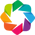

In [3]:
import geopandas as gpd
import geoviews as gv
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import panel as pn
from bokeh.models import FixedTicker as bk_FixedTicker, HoverTool as bk_HoverTool
import holoviews as hv

gv.extension('bokeh')

<br><br>
## 1. Mapa Base.

    Será de Wikipedia. Hay otras opciones posibles de Mapa Base.

In [4]:
Mapa_Base = gv.tile_sources.Wikipedia
Mapa_Base  # Ya tenemos Mapa Base y es interactivo!!

:WMTS   [Longitude,Latitude]

---
---
<br><br>
## 2. Colección de shapes de provincias de España.


### - Cargamos en un GeoDataFrame los shapes y una columna extra pob_pad19. Los ficheros los proporciona el Centro Nacional de Información Geográfica<img src="img/cdd.png" align='right' />
- Proporciona los shapes de los límites administrativos de Provincias. [Datos de shapes](https://centrodedescargas.cnig.es/CentroDescargas)

[Escovid19data  Datos provinciales](https://raw.githubusercontent.com/montera34/escovid19data/master/data/output/covid19-provincias-spain_consolidated.csv)
- Podríamos acceder a estos ficheros directamente online ó descargarlo y usarlo como fichero local.
<br><br>
#### **PREVIAMENTE** he descargado el fichero con los shapes de las provincias a un subdirectorio llamado 'Shapes_Provincias'
### Cargando los shapes

In [75]:

#gdf_provincias = gpd.read_file('Shapes_Provincias/SIGLIM_Publico_INSPIRE/SHP_ETRS89/recintos_provinciales_inspire_peninbal_etrs89/') # Le he indicado el nombre del subdirectorio y geopandas se encarga de cargar lo necesario.
gdf_provincias = gpd.read_file('/propios/curro/io/py_Mapas/Shapes_Provincias/carto') # Le he indicado el nombre del subdirectorio y geopandas se encarga de cargar lo necesario.

gdf_provincias['codigo']=gdf_provincias['codigo'].astype(int)
gdf_provincias_Mercator = gdf_provincias.to_crs(ccrs.GOOGLE_MERCATOR.proj4_init)  # Hay que adaptar las coordenadas de los shapes al estandar Mercator. Dejo los dos GeoDataFrame por si se quieren ver después.
gdf_provincias_Mercator.info(memory_usage='deep')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  52 non-null     int64   
 1   ccaa        52 non-null     object  
 2   cod_ccaa    52 non-null     object  
 3   texto_alt   52 non-null     object  
 4   texto       52 non-null     object  
 5   codigo      52 non-null     int64   
 6   geometry    52 non-null     geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 15.7 KB


In [76]:
gdf_provincias_Mercator.head(3)

cartodb_id                  ccaa cod_ccaa texto_alt     texto  codigo  \
0           1           PaÃ­s Vasco       16     Araba    Ãlava       1   
1           2  Castilla - La Mancha       08  Albacete  Albacete       2   
2           3  Comunitat Valenciana       10   Alacant  Alicante       3   

                                            geometry  
0  POLYGON ((-336941.173 5345006.451, -336073.365...  
1  POLYGON ((-165159.895 4781759.158, -165693.408...  
2  MULTIPOLYGON (((-54041.438 4602770.885, -54040...

In [77]:
gdf_provincias_Mercator.info(memory_usage='deep')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  52 non-null     int64   
 1   ccaa        52 non-null     object  
 2   cod_ccaa    52 non-null     object  
 3   texto_alt   52 non-null     object  
 4   texto       52 non-null     object  
 5   codigo      52 non-null     int64   
 6   geometry    52 non-null     geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 15.7 KB


In [78]:
Mapa_provincias = gv.Polygons(gdf_provincias_Mercator,  crs=ccrs.GOOGLE_MERCATOR)  
Mapa_provincias   # Ya tenemos la capa de provincias!!

:Polygons   [Longitude,Latitude]

### 2.1 Juntamos el Base y los Shapes de ZBS

In [79]:
Mapa_Base * Mapa_provincias  # Juntando Piezas.

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

----
----
<br><br>
## 3. Cargamos datos de COVID para cada provincia

- Escovid19data proporciona un fichero csv con los datos COVID para todas las provincias desde el principio de la pandemia. Se actualiza a diario, Un gran trabajo, disponible en el repositorio https://github.com/montera34/escovid19data para usarlo y agradecerlo.

[Datos COVID-19 por provincia](https://raw.githubusercontent.com/montera34/escovid19data/master/data/output/covid19-provincias-spain_consolidated.csv)

In [80]:
# Cargamos los datos y los preparamos un poquito.

%time df_covid_provincias_hist = pd.read_csv('./datos/covid19-provincias-spain_consolidated.csv', sep=',', encoding='utf-8', decimal='.', parse_dates=['date'], usecols=['date', 'province', 'ine_code', 'ccaa', 'poblacion', 'ia14'] )

CPU times: user 68.5 ms, sys: 11 ms, total: 79.5 ms
Wall time: 79.3 ms


In [81]:
df_covid_provincias_hist.head(3)

date          province  ine_code                  ccaa  poblacion  \
0 2020-01-01          Albacete         2  Castilla - La Mancha     388167   
1 2020-01-01  Alicante/Alacant         3  Comunitat Valenciana    1858683   
2 2020-01-01           Almería         4             Andalucía     716820   

   ia14  
0   NaN  
1   NaN  
2   NaN

In [82]:

df_covid_provincias_hist.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19684 entries, 0 to 19683
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       19684 non-null  datetime64[ns]
 1   province   19684 non-null  object        
 2   ine_code   19684 non-null  int64         
 3   ccaa       19684 non-null  object        
 4   poblacion  19684 non-null  int64         
 5   ia14       12477 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.5 MB


In [98]:
df_covid_provincias.ccaa.unique()

array(['Castilla - La Mancha', 'Comunitat Valenciana', 'Andalucía',
       'País Vasco', 'Asturias, Principado de', 'Castilla y León',
       'Extremadura', 'Balears, Illes', 'Cataluña', 'Cantabria', 'Ceuta',
       'Galicia', 'Aragón', 'Madrid, Comunidad de', 'Melilla',
       'Murcia, Región de', 'Navarra, Comunidad Foral de', 'Canarias',
       'Rioja, La'], dtype=object)

gdf_provincias_Mercator.sort_values(by='NAMEUNIT', ascending=True).head()

<br><br>
### 3.1 Filtramos los últimos datos del fichero

In [117]:
#  En el fichero vienen los datos semanales desde el 2 de julio. Ahora, queremos el último dato de cada ZBS. 

##df_provincias_ultimo_dia = df_covid_provincias.loc[(df_covid_provincias.date==df_covid_provincias.date.max()),['ia14','ine_code','date']]
df_provincias_ultimo_dia = df_covid_provincias.loc[(df_covid_provincias.date=='2021-01-12'),['ia14','ine_code','date','ccaa','province']]
df_provincias_ultimo_dia.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 19604 to 19655
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ia14      47 non-null     float64       
 1   ine_code  52 non-null     int64         
 2   date      52 non-null     datetime64[ns]
 3   ccaa      52 non-null     object        
 4   province  52 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 9.7 KB


In [122]:
gdf_covid_provincias = gdf_provincias_Mercator.xs(['codigo','geometry'], axis=1).merge(df_provincias_ultimo_dia, left_on='codigo', right_on='ine_code')
gdf_covid_provincias.drop(columns=['codigo'], inplace=True)
gdf_covid_provincias.info(memory_usage='deep')

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   geometry  52 non-null     geometry      
 1   ia14      47 non-null     float64       
 2   ine_code  52 non-null     int64         
 3   date      52 non-null     datetime64[ns]
 4   ccaa      52 non-null     object        
 5   province  52 non-null     object        
dtypes: datetime64[ns](1), float64(1), geometry(1), int64(1), object(2)
memory usage: 10.2 KB


In [123]:
gdf_covid_provincias.head()

geometry   ia14  ine_code  \
0  POLYGON ((-336941.173 5345006.451, -336073.365...  322.4         1   
1  POLYGON ((-165159.895 4781759.158, -165693.408...  671.1         2   
2  MULTIPOLYGON (((-54041.438 4602770.885, -54040...  664.3         3   
3  MULTIPOLYGON (((-243905.754 4400154.911, -2439...  457.0         4   
4  POLYGON ((-558140.084 5036598.554, -557815.198...  744.7         5   

        date                  ccaa          province  
0 2021-01-12            País Vasco       Araba/Álava  
1 2021-01-12  Castilla - La Mancha          Albacete  
2 2021-01-12  Comunitat Valenciana  Alicante/Alacant  
3 2021-01-12             Andalucía           Almería  
4 2021-01-12       Castilla y León             Ávila

<br><br>
Vemos un DataFrame con 286 registros.

Uno por cada ZBS
Con 3 campos en cada registro.
- Codigo_geo:     Identifica a cada ZBS.
- fecha_informe:  fecha de los datos
- TIA-14:         Tasa de Incidencia Acumulada en los últimos 14 días.

----
----

<br><br>
## 4. Añadimos los datos de TIA_14d al GeoDataFrame

In [124]:
gdf_covid_provincias.head()

geometry   ia14  ine_code  \
0  POLYGON ((-336941.173 5345006.451, -336073.365...  322.4         1   
1  POLYGON ((-165159.895 4781759.158, -165693.408...  671.1         2   
2  MULTIPOLYGON (((-54041.438 4602770.885, -54040...  664.3         3   
3  MULTIPOLYGON (((-243905.754 4400154.911, -2439...  457.0         4   
4  POLYGON ((-558140.084 5036598.554, -557815.198...  744.7         5   

        date                  ccaa          province  
0 2021-01-12            País Vasco       Araba/Álava  
1 2021-01-12  Castilla - La Mancha          Albacete  
2 2021-01-12  Comunitat Valenciana  Alicante/Alacant  
3 2021-01-12             Andalucía           Almería  
4 2021-01-12       Castilla y León             Ávila

In [136]:
Mapa_provincias_COVID = gv.Polygons(gdf_covid_provincias, vdims=['ia14'], crs=ccrs.GOOGLE_MERCATOR)
Mapa_provincias_COVID.opts(  cmap='magma_r',  colorbar=True, height=900, width=1000)

:Polygons   [Longitude,Latitude]   (ia14)

---
---
### 5. Mapa interactivo con los datos.

 - Juntamos Mapa Base y la capa Mapa_ZBS_COVID.
 - Tocamos algo las opciones para adaptar la visibilidad.

In [133]:
df_zbs_ultimo_dia.info(memory_usage='deep')

NameError: name 'df_zbs_ultimo_dia' is not defined

In [139]:
# Definimos un colormap a medida para la ocasión.
colormap_COVID = ['#006837' , '#86cb66', '#ffffbf', '#f98e52', '#a50026', '#000000']

Niveles_COVID = [0, 25, 50, 150, 250, 600, 630]

Colorbar_ticks = bk_FixedTicker(ticks=[  12.5, 25, 37.5, 50, 100, 150, 200, 250, 325, 600, 630])

Colorbar_labels =  {
            37.5: 'Riesgo Bajo',
            12.5: 'Nueva Normalidad',
            25:   '25',
            50:   '50',
            100: 'Riesgo Medio',
            150:  '150',
            200: 'Riesgo Alto',
            250:  '250',
            325: 'Riesgo Extremo',
            600:  '600',
            630: 'Riesgo CAM Extremo'
        }


# Mapa Base con Shapes de ZBS y con gradiente de color según TIA_14d

In [140]:
Mapa_Base.opts(alpha=0.7, xaxis=None, yaxis=None) * \
Mapa_provincias_COVID.opts( color='ia14',  width=1000, xaxis=None, yaxis=None, height=900, tools=['hover'], alpha=0.75,
                    color_levels=Niveles_COVID, clim=(0,630), 
                    cmap= colormap_COVID, colorbar=True, colorbar_opts={
                    'major_label_overrides': Colorbar_labels,
                    'major_label_text_align': 'left', 'ticker': Colorbar_ticks
                    })

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (ia14)

# Hacemos otro?

Fácil de adaptar, el tamaño, la transparencia ('alpha') de los shapes. 

In [ ]:
Mapa_ZBS_COVID.opts(alpha=0.9, width=700,height=630)

----
<br><br>
## Y cuando lo exportamos en formato html. Sigue interactivo!!

In [ ]:
gv.renderer('bokeh').save( Mapa_ZBS_COVID, 'ZBS_Madrid')  # aquí hemos creado el fichero ZBS_Madrid.html

<br><br>

## Lo hacemos más interactivo con opción de Vistas por Condición?

    - Por ejemplo: Filtrar las ZBS con TIA_14d mayor que un valor indicado. Es fácil.
    
    AVISO: Tarda un poquito en realizar el filtrado.

In [ ]:
# Creamos un pop-up a medida

hover_ZBS = bk_HoverTool(tooltips= [  ("Zona Básica Sanitaria  ", "  @zona_basic"), ("TIA-14 ", " @{TIA_14d}{0.0}"), ("Dia " , " @{fecha_informe}{%F}") ],
                         formatters={'@{fecha_informe}': 'datetime'} )



In [ ]:
# Creamos una función para reutilizarla

def Actualizar_polys(umbral):

    return gv.Polygons(gdf_CAM_COVID[gdf_CAM_COVID['TIA_14d'] > umbral], vdims=['TIA_14d', 'zona_basic','fecha_informe'], crs=ccrs.GOOGLE_MERCATOR).opts(clim=(0, 430), width=900, height=950, tools=[hover_ZBS], alpha=0.65,
                    color_levels=Niveles_COVID, line_color='grey',
                    cmap= colormap_COVID, colorbar=True, colorbar_opts={
                    'major_label_overrides': Colorbar_labels,
                    'major_label_text_align': 'left', 'ticker': Colorbar_ticks
                    })



wdg_IntSlider = pn.widgets.IntSlider(name='TIA_14d Mayor que ', start=0, end=int(gdf_CAM_COVID['TIA_14d'].max()-1), value=400)


pn.Row(
    wdg_IntSlider,
    gv.tile_sources.Wikipedia(alpha=0.6) * 
    gv.DynamicMap(pn.bind(Actualizar_polys, wdg_IntSlider))
)



In [ ]:
# Otro Semejante, igual de interactivo SIN Mapa Base


pn.Column( Markdown(f"## <br><br> Puedes filtrar el valor de TIA-14d."),
           Markdown(f"### Presentará las ZBS con TIA_14d Mayor de la seleccionada."),
           pn.Row(
                wdg_IntSlider,
                gv.DynamicMap(pn.bind(Actualizar_polys, wdg_IntSlider))
            )
        )

<br><br>
### Ahora creamos un GeoDataFrame con los datos históricos de las ZBS para todas las fechas desde el verano gdf_zbs_historico.

In [ ]:

gdf_zbs_historico = gdf_CAM.merge(df_zonas_basicas, on='codigo_geo')

gdf_zbs_historico.info(memory_usage='deep')


<br><br>
## Permitimos interactuar tanto por umbral de TIA_14d como la evolución en el tiempo de todas las ZBS.


In [ ]:
import holoviews as hv

def Actualizar_polys_fecha(umbral, fecha):
    
    return hv.Polygons(gdf_zbs_historico.loc[(gdf_zbs_historico['TIA_14d'] > umbral) & (gdf_zbs_historico.fecha_informe.dt.strftime("%F")==fecha)], vdims=['TIA_14d', 'zona_basic', 'fecha_informe']).opts(
                    clim=(0, 430), width=900, height=950, tools=[hover_ZBS], alpha=0.65, xaxis=None, yaxis=None,
                    color_levels=Niveles_COVID, line_color='grey',
                    cmap= colormap_COVID, colorbar=True, colorbar_opts={
                    'major_label_overrides': Colorbar_labels,
                    'major_label_text_align': 'left', 'ticker': Colorbar_ticks
                    }, bgcolor='lightgray')



fechas = sorted(gdf_zbs_historico.fecha_informe.dt.strftime("%F").unique())

wdg_IntSlider = pn.widgets.IntSlider(name='TIA_14d Mayor que ', start=0, end=int(gdf_zbs_historico['TIA_14d'].max()-1))
wdg_Slider = pn.widgets.DiscreteSlider(name='Dia ', options=fechas, value=fechas[-1])

pn.Row( pn.Column(
            Markdown(f"## <br><br> Puedes filtrar el valor de TIA-14d."),
            Markdown(f"### Presentará las ZBS con TIA_14d Mayor de la seleccionada."),
            Markdown(f"<br>## Se puede seleccionar otras fechas para ver el pasado y la evolución"),
    wdg_IntSlider, wdg_Slider),
    gv.DynamicMap(pn.bind(Actualizar_polys_fecha, wdg_IntSlider, wdg_Slider))
)



In [ ]:
# Cuántás ZBS hay en cada Nivel de Riesgo
gdf_CAM_COVID.TIA_14d.value_counts(bins=pd.IntervalIndex.from_tuples([ (0, 25), (25,50), (50, 150), (150, 250), (250, 400), (400, gdf_CAM_COVID.TIA_14d.max()+1)], closed='left' )).sort_index(ascending=False)
